# Project Name : Data Science Salaries 2023
data set link : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

About Dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

Date : 20/06/2023


# Downloading the dataset 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
data_set_url = "https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023"

In [3]:
import opendatasets as od
od.download(data_set_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tawhid885
Your Kaggle Key: ········


100%|███████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 306kB/s]

In [4]:
data_dir = "./data-science-salaries-2023"

In [5]:
import os
os.listdir(data_dir)

['ds_salaries.csv']

In [6]:
project_name = "zerotopandas-course-project-starter"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hossenshakil885/zerotopandas-course-project-starter" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/hossenshakil885/zerotopandas-course-project-starter


'https://jovian.com/hossenshakil885/zerotopandas-course-project-starter'

# Data preparation and cleaning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
salary_df = pd.read_csv(data_dir/"ds_salaries.csv")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [12]:
salary_df = pd.read_csv(data_dir+"/ds_salaries.csv")

In [13]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [14]:
salary_df.shape

(3755, 11)

In [15]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
salary_df.describe

<bound method NDFrame.describe of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency

In [17]:
salary_df.job_title.unique

<bound method Series.unique of 0       Principal Data Scientist
1                    ML Engineer
2                    ML Engineer
3                 Data Scientist
4                 Data Scientist
                  ...           
3750              Data Scientist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
3754        Data Science Manager
Name: job_title, Length: 3755, dtype: object>

In [18]:
salary_df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [19]:
len(salary_df.job_title.unique())

93

In [20]:
salary_df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


# Data cleaning
Data cleaning means fixing bad data in your data set.

Bad data could be:

* Empty cells
* Data in wrong format
* Wrong data
* Duplicates

## First step is to remove empty cells

In [21]:
salary_df.dropna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## One way to solve this is to drop the whole row as data set is big it will not affect the result

In [22]:
new_dataset = salary_df.dropna()

In [23]:
new_dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [24]:
salary_df.shape

(3755, 11)

In [25]:
new_dataset.shape

(3755, 11)

## Another way of get rid of this problem is to fill the empty cell with mean, median, mode value

# Fill with mean 
```
import pandas as pd

df = pd.read_csv('data.csv')

x = df["Calories"].mean()

df["Calories"].fillna(x, inplace = True)
```

# Fill with median
```
import pandas as pd

df = pd.read_csv('data.csv')

x = df["Calories"].median()

df["Calories"].fillna(x, inplace = True)
```

# Fill with mode 
```
import pandas as pd

df = pd.read_csv('data.csv')

x = df["Calories"].mode()[0]

df["Calories"].fillna(x, inplace = True)
```

# Wrong Data

In [28]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
salary_df.salary_In_usd

AttributeError: 'DataFrame' object has no attribute 'salary_In_usd'

In [30]:
salary_df['salary_In_usd']

KeyError: 'salary_In_usd'

In [31]:
salary_df["salary_in_usd"]

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [32]:
max(salary_df["salary_in_usd"])

450000

In [33]:
for i in salary_df.index:
    if salary_df.loc[i, "work_year"]>2023:
        salary_df.drop(i,inplace =True)

In [34]:
salary_df.shape

(3755, 11)

In [35]:
df.duplicated()

NameError: name 'df' is not defined

In [36]:
salary_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

In [37]:
salary_df.drop_duplicates(inplace=True)

In [38]:
salary_df.shape

(2584, 11)

In [39]:
salary_df.corr()

ValueError: could not convert string to float: 'SE'

In [40]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [41]:
salary_df["salary_in_taka"] = salary_df["salary_in_usd"] * 115

In [42]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_in_taka'],
      dtype='object')

In [43]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,9872405
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,3450000
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2932500
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,20125000
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,13800000
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,47380000
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,17365000
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,12075000
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,11500000


In [44]:
salary_df.sort_values(by="salary_in_taka")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M,590180
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M,622035
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L,622035
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S,653085
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M,656305
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,47840000
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,48645000
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L,48740910
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M,49561205


In [45]:
salary_df.sort_values(by="salary_in_taka", ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,51750000
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M,49561205
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L,48740910
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,48645000
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,47840000
...,...,...,...,...,...,...,...,...,...,...,...,...
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M,656305
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S,653085
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M,622035
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L,622035


# year vs salary 

In [46]:
year = salary_df["work_year"]
salary = salary_df["salary_in_usd"]

Text(0.5, 1.0, 'Data scientist salary over several years')

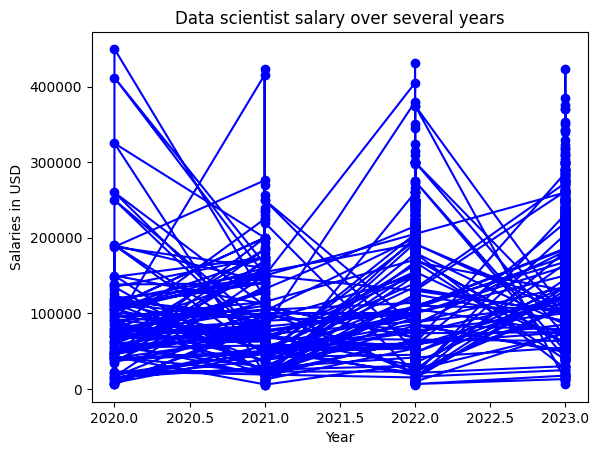

In [47]:
plt.plot(year, salary, 'o-b')
plt.xlabel("Year")
plt.ylabel("Salaries in USD")
plt.title("Data scientist salary over several years")

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

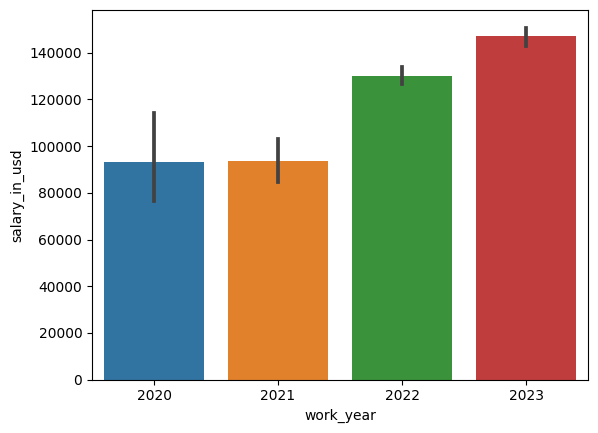

In [48]:
sns.barplot(x=year, y = salary)

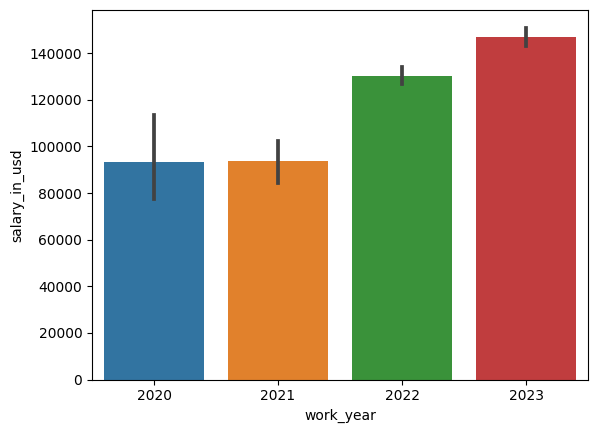

In [49]:
sns.barplot(x="work_year", y="salary_in_usd", data=salary_df);

In [50]:
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,9872405
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,3450000
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2932500
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,20125000
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,13800000
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,47380000
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,17365000
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,12075000
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,11500000


In [51]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_in_taka'],
      dtype='object')

In [52]:
salary_df["employee_residence"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [53]:
len(salary_df["employee_residence"].unique())

78

In [54]:
list_of_highst_paid_nations = salary_df.sort_values(by="salary_in_usd", ascending=False).head(10)

In [55]:
list_of_highst_paid_nations

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,51750000
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M,49561205
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L,48740910
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,48645000
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,47840000
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,47380000
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L,46575000
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M,44275000
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L,43700000
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M,43249200


In [56]:
list_of_highst_paid_nations["employee_residence"]

3522    US
2011    GB
528     IL
3747    US
3675    US
3750    US
3463    US
1288    US
3468    US
649     US
Name: employee_residence, dtype: object

In [57]:
salary_df.group_by(on="salary_in_usd")

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [58]:
salary_df.group_by(by="salary_in_usd")

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [59]:
salary_df.groupby(by="employee_residence")

In [60]:
salary_df.groupby(by="employee_residence").head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,9872405
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,3450000
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2932500
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,20125000
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,13800000
...,...,...,...,...,...,...,...,...,...,...,...,...
3730,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,0,AT,S,10492255
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S,5246070
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S,19320000
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M,13691785


In [61]:
salary_df.groupby("employee_residence")["US"].mean()

KeyError: 'Column not found: US'

In [62]:
salary_df.groupby("employee_residence").mean()

TypeError: Could not convert SESEMI to numeric

In [63]:
salary_df.groupby("employee_residence")

In [64]:
salary_df.groupby("employee_residence").head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_taka
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,9872405
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,3450000
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2932500
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,20125000
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,13800000
...,...,...,...,...,...,...,...,...,...,...,...,...
3721,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S,6900000
3724,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L,6796730
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S,5246070
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M,13691785


In [65]:
salary_df.groupby("employee_residence")["salary_in_usd"].mean()

employee_residence
AE    100000.000000
AM     50000.000000
AR     35500.000000
AS     32777.500000
AT     71125.833333
          ...      
TR     19058.000000
UA     57850.000000
US    153972.206550
UZ    103000.000000
VN     33466.666667
Name: salary_in_usd, Length: 78, dtype: float64

In [66]:
salary_df.groupby("employee_residence")["salary_in_usd", "salary_in_taka"].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [67]:
salary_df.groupby("employee_residence")[["salary_in_usd", "salary_in_taka"]].mean()

,salary_in_usd,salary_in_taka
employee_residence,,
AE,100000.000000,1.150000e+07
AM,50000.000000,5.750000e+06
AR,35500.000000,4.082500e+06
AS,32777.500000,3.769412e+06
AT,71125.833333,8.179471e+06
...,...,...
TR,19058.000000,2.191670e+06
UA,57850.000000,6.652750e+06
US,153972.206550,1.770680e+07


In [68]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hossenshakil885/zerotopandas-course-project-starter" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/hossenshakil885/zerotopandas-course-project-starter


'https://jovian.com/hossenshakil885/zerotopandas-course-project-starter'